In [434]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [435]:
data = pd.read_csv("/home/engineer/Kaggle_dataset/Prostate_Cancer.csv")


In [436]:
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [437]:
data.diagnosis_result.value_counts()

M    62
B    38
Name: diagnosis_result, dtype: int64

In [438]:
data.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [439]:
data.dtypes

id                     int64
diagnosis_result      object
radius                 int64
texture                int64
perimeter              int64
area                   int64
smoothness           float64
compactness          float64
symmetry             float64
fractal_dimension    float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3a351ce48>,
      dtype=object)

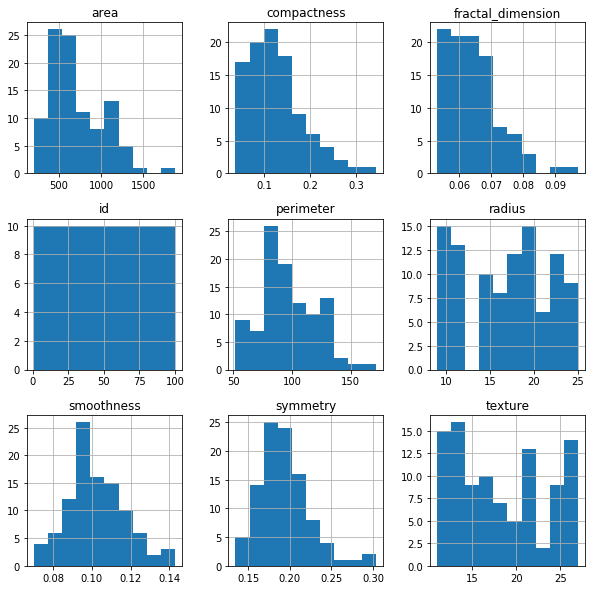

In [440]:
data.hist(figsize=(10,10))

id                       AxesSubplot(0.125,0.71587;0.168478x0.16413)
radius                AxesSubplot(0.327174,0.71587;0.168478x0.16413)
texture               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
perimeter             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
area                    AxesSubplot(0.125,0.518913;0.168478x0.16413)
smoothness           AxesSubplot(0.327174,0.518913;0.168478x0.16413)
compactness          AxesSubplot(0.529348,0.518913;0.168478x0.16413)
symmetry             AxesSubplot(0.731522,0.518913;0.168478x0.16413)
fractal_dimension       AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

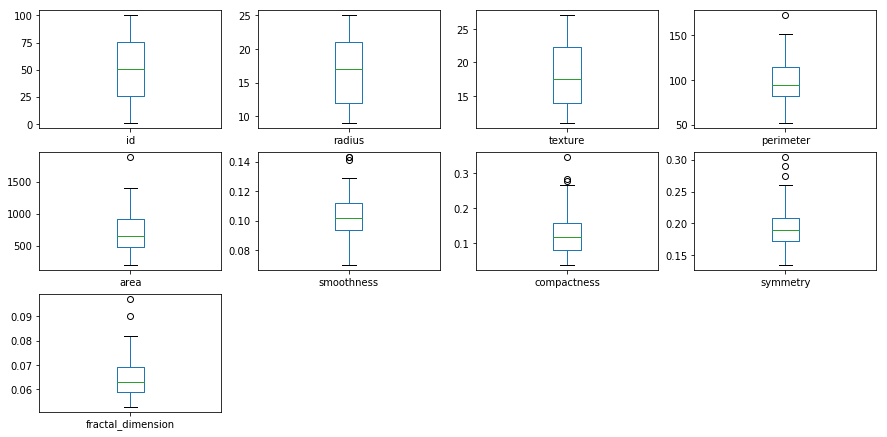

In [441]:
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
#several features have outliers

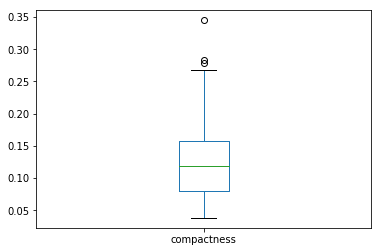

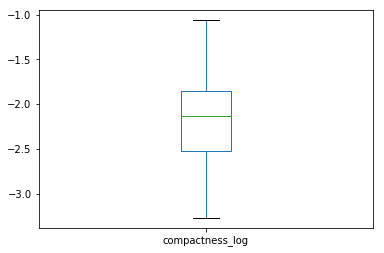

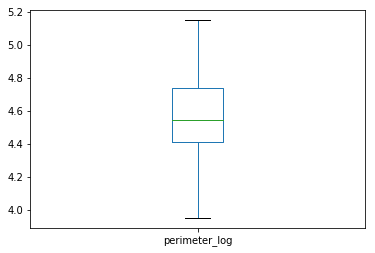

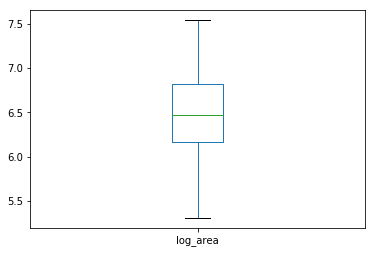

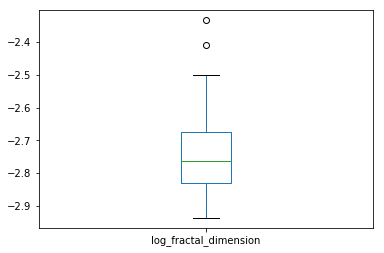

In [442]:
#reducing the number of outliers 
data.compactness.plot.box()
log_compactness = np.log(data.compactness)
plt.subplots()

# log_compactness.plot.hist(bins=20)
data['compactness_log'] = log_compactness
data.compactness_log.plot.box()

plt.subplots()

perimeter_log = np.log(data.perimeter)
data['perimeter_log'] = perimeter_log
data.perimeter_log.plot.box()

plt.subplots()

log_area = np.log(data.area)
data['log_area'] = log_area
data.log_area.plot.box()

plt.subplots()

log_fractal_dimension = np.log(data.fractal_dimension)
data['log_fractal_dimension'] = log_fractal_dimension
data.log_fractal_dimension.plot.box()


log_symmetry = np.log(data.symmetry)
data['log_symmetry'] = log_symmetry

log_smoothness = np.log(data.smoothness)
data['log_smoothness'] = log_smoothness



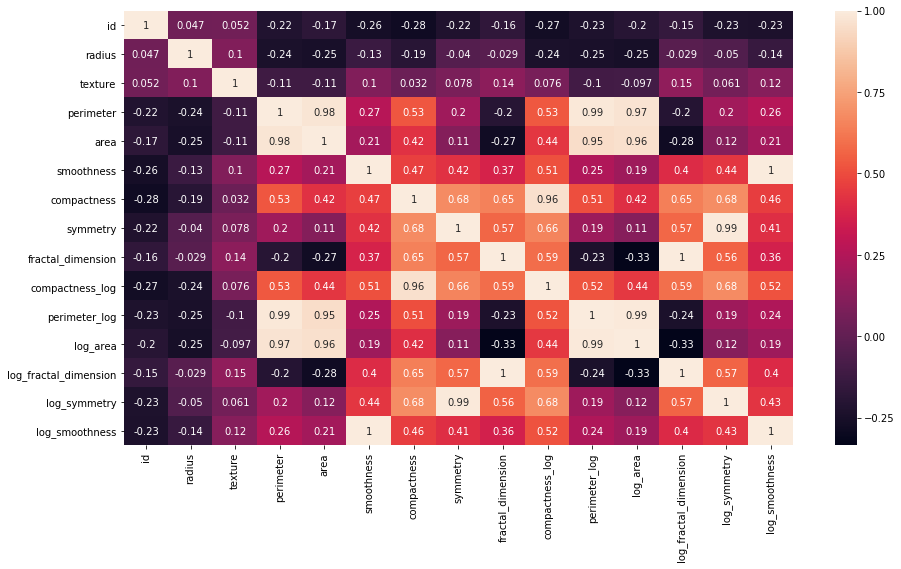

In [443]:
import seaborn as sns
#data = data.drop('id',axis=1)
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True )

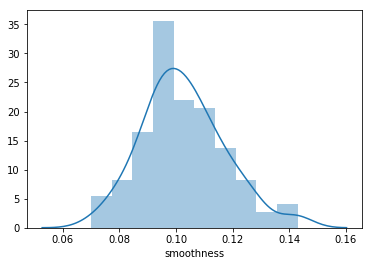

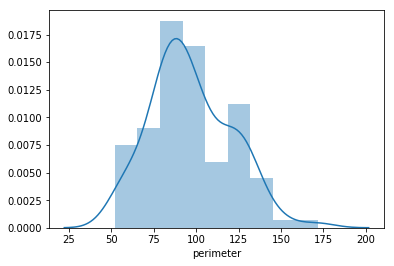

In [444]:
#univariate analysis - checking if we get a normal distribution

sns.distplot(data.smoothness)
plt.subplots()
sns.distplot(data.perimeter)

Text(0,0.5,'symmetry')

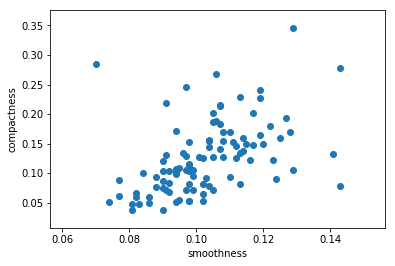

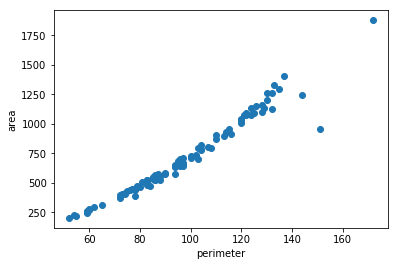

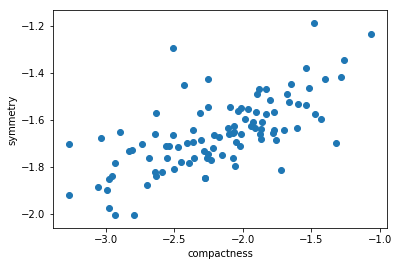

In [445]:
#bivariate analysis - though this can also be checked through the heatmap plotted above(correlation) but 
# it is also better to see if there is any linearity or curve 

plt.scatter(data.smoothness, data.compactness)
plt.xlabel('smoothness')
plt.ylabel('compactness')
plt.subplots()
plt.scatter(data.perimeter, data.area)
plt.xlabel('perimeter')
plt.ylabel('area')

plt.subplots()
plt.scatter(data.compactness_log, data.log_symmetry)
plt.xlabel('compactness')
plt.ylabel('symmetry')

In [446]:
#making a function for bivariate analysis between features and diagnostic result i.e how many people fall in eacy category 
def bivariate_analysis(feature, compare_feature, bins, multiplying_factor):
    feature_ = feature*multiplying_factor
    dat = pd.cut(feature_, bins=bins)
    comp_result = pd.crosstab(dat, compare_feature)
    comp_result.div(comp_result.sum(1), axis=0).plot(kind="bar", stacked=True)
    print(dat.value_counts())

(5, 10]     33
(10, 15]    32
(15, 20]    17
(20, 25]     9
(0, 5]       5
(25, 30]     3
(30, 35]     1
Name: compactness, dtype: int64
(15, 20]    63
(20, 25]    27
(10, 15]     5
(25, 30]     4
(30, 35]     1
(5, 10]      0
(0, 5]       0
Name: symmetry, dtype: int64
(9, 11]     54
(11, 13]    24
(7, 9]      19
(13, 15]     3
(5, 7]       0
Name: smoothness, dtype: int64
(14, 19]    34
(9, 14]     29
(19, 24]    27
(24, 29]     6
(4, 9]       4
(-1, 4]      0
Name: radius, dtype: int64
(80, 120]     56
(40, 80]      24
(120, 160]    19
(160, 200]     1
(0, 40]        0
Name: perimeter, dtype: int64
(10, 15]    40
(20, 25]    24
(15, 20]    22
(25, 30]    14
(5, 10]      0
(0, 5]       0
Name: texture, dtype: int64


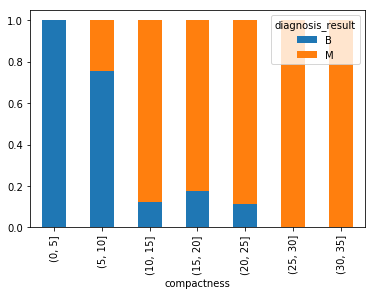

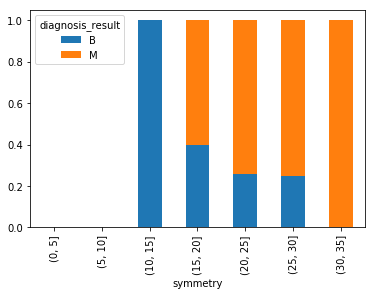

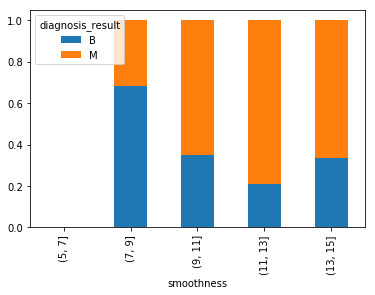

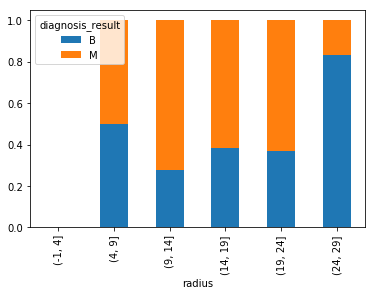

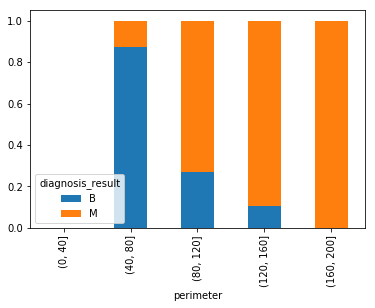

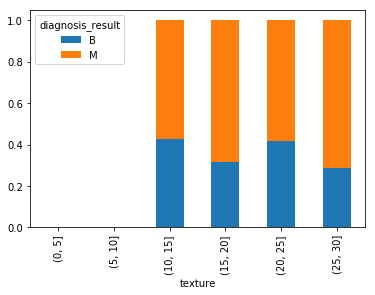

In [447]:
bins = list(range(0,40,5))
bivariate_analysis(data.compactness,data.diagnosis_result,bins,100 )
bivariate_analysis(data.symmetry,data.diagnosis_result,bins,100 )
bivariate_analysis(data.smoothness,data.diagnosis_result,list(range(5,16,2)),100 )
bivariate_analysis(data.radius,data.diagnosis_result,list(range(-1,30,5)),1)
bivariate_analysis(data.perimeter,data.diagnosis_result,list(range(0,240,40)),1)
bivariate_analysis(data.texture,data.diagnosis_result,list(range(0,35,5)),1)


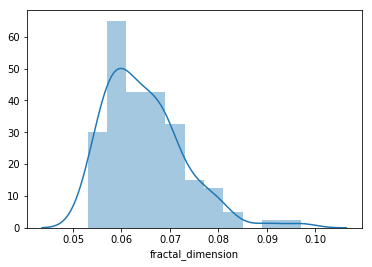

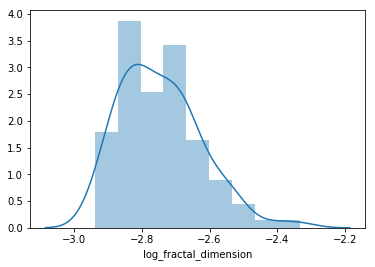

In [448]:
data.texture.describe()
sns.distplot(data.fractal_dimension)
plt.subplots()
sns.distplot(data.log_fractal_dimension)

In [449]:
#creating an array of values eliminating values with z score > 2.5 std dev
mean = np.mean(data.log_fractal_dimension)
std_dev = np.std(data.log_fractal_dimension)
z = [x for x in data.log_fractal_dimension if(x > mean - 2.5*std_dev)]
z = [x for x in z if(x < mean + 2.5*std_dev)]

{'boxes': [<matplotlib.lines.Line2D at 0x7fd3a23d23c8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd3a23d2dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3a22b9a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd3a22b9668>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd3a23d2518>,
  <matplotlib.lines.Line2D at 0x7fd3a23d29b0>]}

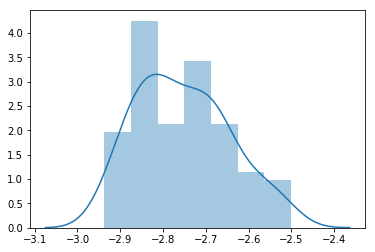

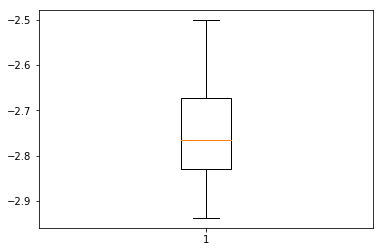

In [450]:
#checking if threshoding the z value to 2.5 std dev works in eliminating the outlier
sns.distplot(z)
plt.subplots()
plt.boxplot(z)

In [451]:
from scipy import stats

In [452]:
#checking the z score of fractal dimension for outlier removal
#checking the number of z values > 2 std dev
z_ = np.abs(stats.zscore(data.log_fractal_dimension))
sum(z_>2)

3

In [453]:
data_copy = data

In [455]:
z_ = np.abs(stats.zscore(data_copy.log_fractal_dimension))
for i in range(len(z_)):
    if(z_[i] > 2.5):
        data_copy.drop(data_copy.index[i], inplace=True)

In [456]:
z_ = np.abs(stats.zscore(data_copy.log_symmetry))
for i in range(len(z_)):
    if(z_[i] > 2.5):
        data_copy.drop(data_copy.index[i], inplace=True)

In [457]:
data_copy.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension',
       'compactness_log', 'perimeter_log', 'log_area', 'log_fractal_dimension',
       'log_symmetry', 'log_smoothness'],
      dtype='object')

In [458]:
#dropping all the features and just keeping the log of features without and outlier
data_copy= data_copy.drop(columns=['symmetry','id', 'perimeter', 'area', 'smoothness', 'compactness', 
                                   'smoothness', 'fractal_dimension'], axis=1)

radius                      AxesSubplot(0.125,0.125;0.0824468x0.755)
texture                  AxesSubplot(0.223936,0.125;0.0824468x0.755)
compactness_log          AxesSubplot(0.322872,0.125;0.0824468x0.755)
perimeter_log            AxesSubplot(0.421809,0.125;0.0824468x0.755)
log_area                 AxesSubplot(0.520745,0.125;0.0824468x0.755)
log_fractal_dimension    AxesSubplot(0.619681,0.125;0.0824468x0.755)
log_symmetry             AxesSubplot(0.718617,0.125;0.0824468x0.755)
log_smoothness           AxesSubplot(0.817553,0.125;0.0824468x0.755)
dtype: object

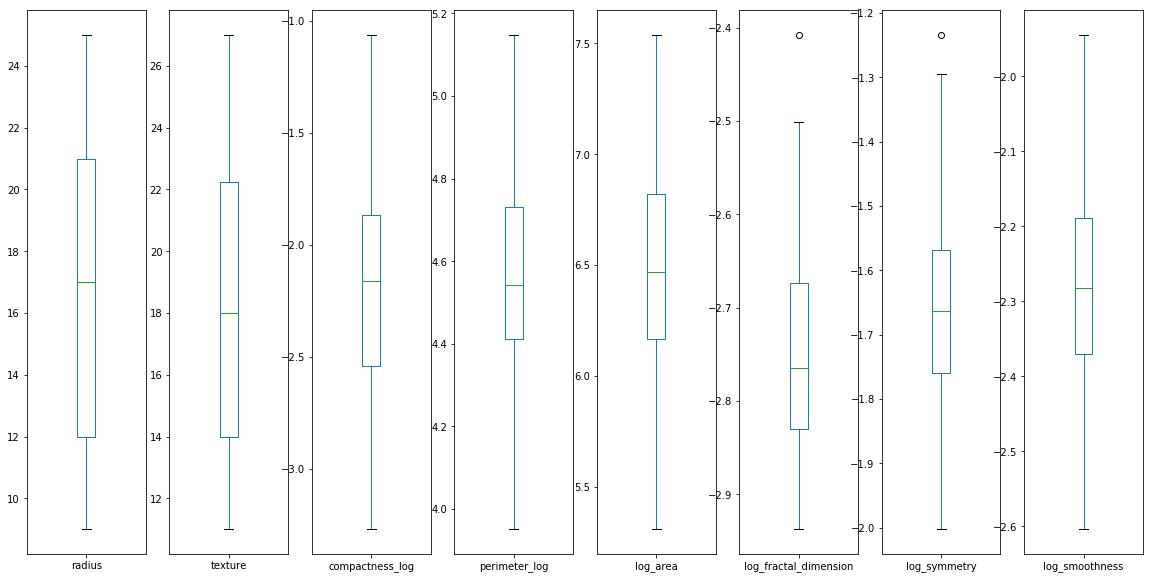

In [459]:
data_copy.plot.box(subplots=True, figsize=(20,10))

In [460]:
#Y takes the 1st column i.e diagnosis result
Y = data_copy.iloc[:,0:1].values
# converting M and B into integer values M->0 and B->1
for i in range(len(Y)):
    if(Y[i]=="M"):
        Y[i] = 0
    if(Y[i]=='B'):
        Y[i]=1
Y=Y.astype('int')
X = data_copy.drop('diagnosis_result', axis=1)
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.2)

In [461]:
train_y.shape
train_x.shape

(76, 8)

In [462]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,confusion_matrix


Accuracy: 85.00%


/home/engineer/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/engineer/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


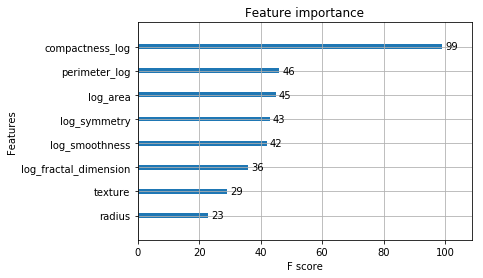

In [466]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

model = XGBClassifier()
model.fit(train_x, train_y)
# make predictions for test data
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
# evaluate predictions
plot_importance(model)
accuracy = accuracy_score(test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [469]:
def train(train_x,train_y, test_x, test_y):
    
    clf_rf = RandomForestClassifier()
    clf_rf = clf_rf.fit(train_x, train_y)
    acc = accuracy_score(test_y, clf_rf.predict(test_x))
    print("accuracy using Random forest classifier is ", acc)
    
    model = LogisticRegression(C=1)
    model.fit(train_x, train_y)
    pred = model.predict(test_x)
    acc = accuracy_score(test_y,pred)
    print("accuracy using Logistic Reg ", acc)
    
    svc = SVC(kernel = "linear", C =0.1)   
    svc.fit(train_x, train_y)
    pred = svc.predict(test_x)
    acc = accuracy_score(test_y,pred)
    print("accuracy using SVM is ", acc)

In [470]:
train(train_x, train_y, test_x, test_y)


accuracy using Random forest classifier is  0.85
accuracy using Logistic Reg  0.85
accuracy using SVM is  0.95


/home/engineer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/home/engineer/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
